In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy

In [87]:
size = 100
sample_1 = np.random.normal(0, size=size)
sample_2 = np.random.normal(3, size=size)

(array([ 3.,  7., 19., 21., 17., 16., 12.,  3.,  1.,  1.]),
 array([1.07777649, 1.56968162, 2.06158675, 2.55349188, 3.04539702,
        3.53730215, 4.02920728, 4.52111241, 5.01301754, 5.50492268,
        5.99682781]),
 <BarContainer object of 10 artists>)

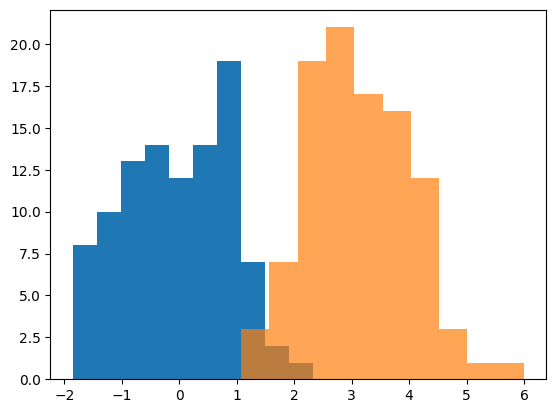

In [88]:
plt.hist(sample_1)
plt.hist(sample_2,alpha=0.7)

In [89]:
x1 = np.mean(sample_1)
x2 = np.mean(sample_2)
n1 = len(sample_1)
n2 = len(sample_2)
sx1 = np.var(sample_1,ddof=1)
sx2 = np.var(sample_2,ddof=1)

print(sx2)

def sp(n1, n2, sx1, sx2):
    return np.sqrt((((n1-1)*(sx1)) + ((n2-1)*(sx2))) / (n1 + n2 - 2))

sp = sp(n1, n2, sx1, sx2)

def t_stat(x1, x2, sp, n1, n2):
    return (x1-x2)/(sp*(((1/n1)+(1/n2))**(1/2)))

print(t_stat(x1, x2, sp, n1, n2))

0.8255210533348348
-23.94165752448975


In [90]:
scipy.stats.ttest_ind(sample_1,sample_2)

TtestResult(statistic=np.float64(-23.94165752448975), pvalue=np.float64(2.2745516388618536e-60), df=np.float64(198.0))

In [104]:
sheet_name = 'K-C and Rosetta Summary'
df = pd.read_excel(
    'Week 4 Lab Data.xlsx',sheet_name=sheet_name,header=1
    )

df_filtered = pd.DataFrame()
for col in df.columns:
    if 'Kozeny-Carmen' in col or 'Rosetta' in col:
        new_colname = col.replace ('\n', '')
        df_filtered[new_colname] = df[col]

df_filtered = df_filtered.dropna()

col1, col2 = df_filtered.columns
scipy.stats.ttest_ind(df_filtered[col1],df_filtered[col2])

TtestResult(statistic=np.float64(4.125167424299875), pvalue=np.float64(0.00015366866640778313), df=np.float64(46.0))